# Prueba técnica Arkon

In [1]:
# Contextualizar problema
"""
1. EDA para responer: 
    - Saturación del servicio
    - Crecimiento de planes
2. Modelado para inferir tipo de plan (Passholdertype)
3. Evaluación del modelo
4. Diagrama de flujo completo para puesta en producción 
"""

'\n1. EDA para responer: \n    - Saturación del servicio\n    - Crecimiento de planes\n2. Modelado para inferir tipo de plan (Passholdertype)\n3. Evaluación del modelo\n4. Diagrama de flujo completo para puesta en producción \n'

In [32]:
# Importar librerias 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns   

In [33]:
dtypes = {
    "trip_id": "string", 
    "duration": "int8", 
    "start_time": "string", # Posteriormente parsear a datetime.
    "end_time":"string", #  Posteriormente parsear a datetime.
    "start_lat":"float32", 
    "start_lon":"float32", 
    "end_lat":"float32", 
    "end_lon":"float32", 
    "bike_id":"string", 
    "plan_duration":"float32", # Por los nulos
    "trip_route_category":"string", 
    "passholder_type":"string", 
    "start_station":"string", 
    "end_station":"string", 
}

In [4]:
# Carga de data
df = pd.read_csv('Data/train_set.csv', dtype=dtypes)

In [5]:
# Revisar el dataframe
df.head(5)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,-118,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443


# Formateo de datos

In [6]:
# Fechas
df['start_time'] = pd.to_datetime(df['start_time'], format='mixed')
df['end_time'] = pd.to_datetime(df['end_time'], format='mixed')

# Análisis valores nulos

In [7]:
# Análisis datos nulos
df.isna().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               5563
start_lon               5563
end_lat                18574
end_lon                18574
bike_id                    0
plan_duration            208
trip_route_category        0
passholder_type         2576
start_station              0
end_station                0
dtype: int64

In [8]:
df['passholder_type'].value_counts()

passholder_type
Monthly Pass    394769
Walk-up         212426
One Day Pass     44455
Annual Pass      34092
Flex Pass        11604
Testing             78
Name: count, dtype: Int64

In [9]:
df[df['plan_duration'].isna()]

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
919,20678886,-65,2017-02-24 13:30:00,2017-02-24 16:41:00,34.046520,-118.237411,NaN,NaN,6213,NaN,One Way,Monthly Pass,3082,3000
2507,18904836,16,2017-01-30 09:06:00,2017-01-30 09:22:00,34.047749,-118.243172,NaN,NaN,5973,NaN,One Way,Monthly Pass,3062,3000
8781,19806046,19,2017-02-11 11:13:00,2017-02-11 11:32:00,34.063389,-118.236160,34.04681,-118.256981,6344,NaN,One Way,Monthly Pass,3066,3064
11695,18784259,3,2017-01-28 17:15:00,2017-01-28 17:18:00,34.040989,-118.255798,34.04211,-118.256187,5988,NaN,One Way,Monthly Pass,3033,3075
15344,18547837,5,2017-01-24 21:38:00,2017-01-24 21:43:00,34.025890,-118.238243,34.02589,-118.238243,5936,NaN,Round Trip,Monthly Pass,4108,4108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694484,21677563,10,2017-03-09 15:18:00,2017-03-09 15:28:00,34.051941,-118.243530,34.04855,-118.259048,5871,NaN,One Way,Monthly Pass,3030,3005
695697,21865973,10,2017-03-11 19:01:00,2017-03-11 19:11:00,34.048401,-118.260948,34.04554,-118.256668,6114,NaN,One Way,Monthly Pass,3035,3006
697461,18209835,31,2017-01-19 17:04:00,2017-01-19 17:35:00,34.037460,-118.265381,NaN,NaN,6101,NaN,One Way,Monthly Pass,3056,3000
697589,21581757,55,2017-03-08 08:22:00,2017-03-08 09:17:00,34.047749,-118.243172,NaN,NaN,6292,NaN,One Way,Monthly Pass,3062,3000


In [10]:
df[df['plan_duration'].isna()]['passholder_type'].value_counts()

passholder_type
Monthly Pass    208
Name: count, dtype: Int64

In [11]:
df[['plan_duration','passholder_type']].value_counts()

plan_duration  passholder_type
30.0           Monthly Pass       393823
1.0            Walk-up            140101
0.0            Walk-up             63275
1.0            One Day Pass        44455
365.0          Annual Pass         34092
               Flex Pass           11604
               Walk-up              6271
30.0           Walk-up              2779
365.0          Monthly Pass          578
150.0          Monthly Pass          160
999.0          Testing                78
Name: count, dtype: int64

In [12]:
# Porcentaje de nulos passholder_type
(2576/df.shape[0])*100

0.368

* Conclusiones análisis nulos
- Datos de las coordenadas (lat, lon) <br>
Al no haber nulos en "start_station" y "end_station", con base en esa información del mismo dataset se podrían obtener los valores faltantes de lat y lon.
- Plan duration <br>
Todos los valores nulos de plan_duration corresponden al tipo de pase "Monthly Pass", por lo que podriamos inferir que el valor de la variable seria 30, sin embargo tambien hay algunos registros con duracion 150 y 365 correspondientes a dicho passholder_type. <br>
Adicionalmente encontramos plan_duration con valores de 999, lo cual no hace sentido y podria indicar que se trata de registros de prueba ("Testing" en "passholder_type), eliminaremos dichos registros.
- Passholder_type: <br>
Al ser la variable objetivo, no se debe imputar, por lo que para el modelado convendría eliminar dichos registros. Además, solo representan el 0.36% del total de los datos. Para efectos del EDA se pueden mantener.


In [13]:
# Eliminar registros passholder_type = Testing
df = df[~(df["passholder_type"] == "Testing")]

In [14]:
# # Imputar valores de lat y lon

# # Definir estaciones, lat y lon
# import pandas as pd
# df_lat_lon_start = df[["start_station", "start_lon", "start_lat"]]
# df_lat_lon_end = df[["end_station", "end_lon", "end_lat"]]
# df_lat_lon_start.columns = ["station", "lon", "lat"] 
# df_lat_lon_end.columns = ["station", "lon", "lat"]
# df_lat_lon = pd.concat([df_lat_lon_start, df_lat_lon_end])      
# df_lat_lon = df_lat_lon.drop_duplicates(subset=["station"])
# df_lat_lon

In [15]:
# # Obtener dict
# dict_lat = dict(zip(df_lat_lon['station'], df_lat_lon['lat']))
# dict_lon = dict(zip(df_lat_lon['station'], df_lat_lon['lon']))

In [16]:
# if df["start_lat"] & df["start_lon"] == None:
#     df["start_lat"].replace(None, dict_lat)
#     df["start_lon"].replace(None, dict_lon)
    

# Visualización

In [17]:
#Trabajar con nuevo df
df_ = df.copy()

C:\Users\ernes\AppData\Local\Temp\ipykernel_19372\3442913204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passholder_type', data=df_, palette='viridis')


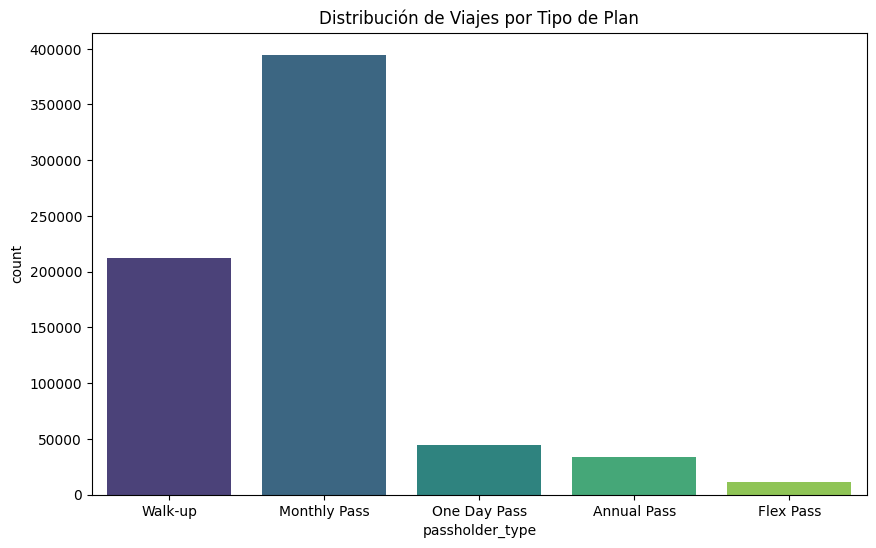

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='passholder_type', data=df_, palette='viridis')
plt.title('Distribución de Viajes por Tipo de Plan')
plt.show()

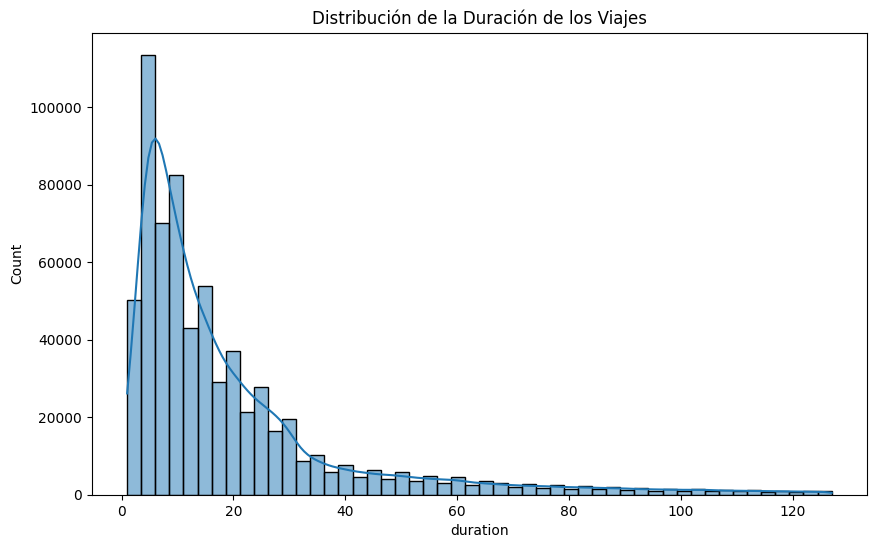

In [19]:
df_temp = df_[df_["duration"] > 0]
plt.figure(figsize=(10, 6))
sns.histplot(df_temp['duration'], bins=50, kde=True)
plt.title('Distribución de la Duración de los Viajes')
plt.show()

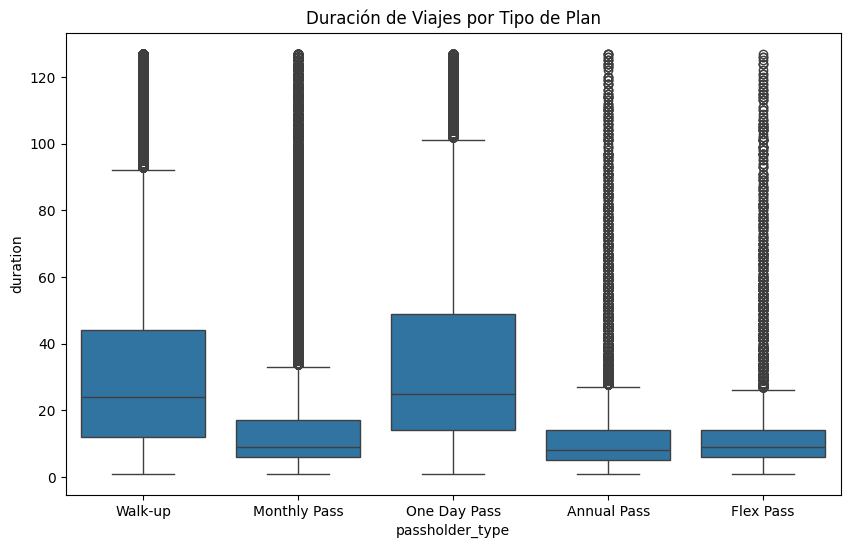

In [20]:
df_temp = df_[df_["duration"] > 0]
plt.figure(figsize=(10, 6))
sns.boxplot(x='passholder_type', y='duration', data=df_temp)
plt.title('Duración de Viajes por Tipo de Plan')
plt.show()

C:\Users\ernes\AppData\Local\Temp\ipykernel_19372\927972355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='start_station', data=df_, order=df['start_station'].value_counts().index[:20], palette='viridis')


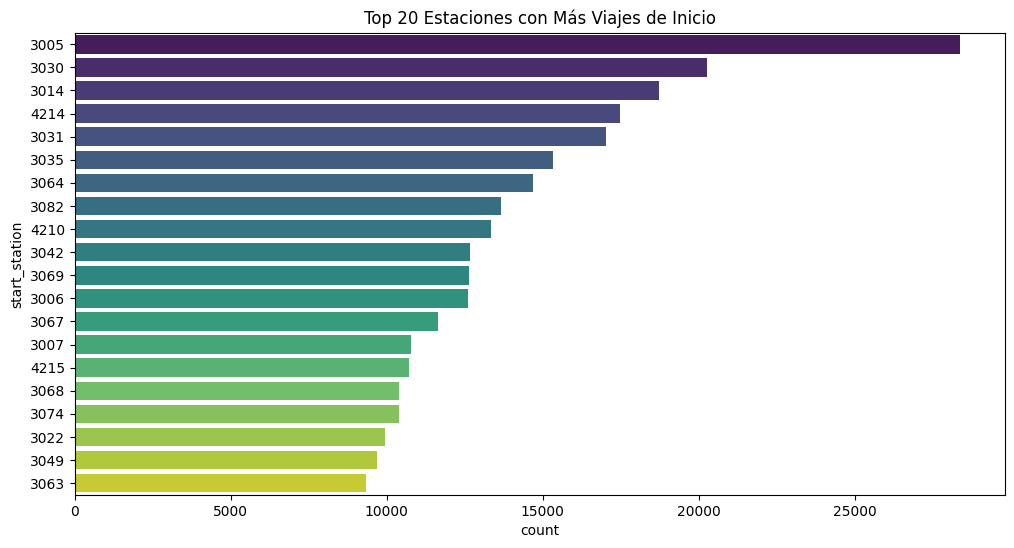

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y='start_station', data=df_, order=df['start_station'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Estaciones con Más Viajes de Inicio')
plt.show()

In [22]:
# Nuevas variables para visualizaciones:

#Dia de la semana
# Extraer el día de la semana (0 = lunes, 6 = domingo)
df_['day_of_week'] = df_['start_time'].dt.dayofweek
# Mapear el número del día de la semana a su nombre
days = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_['day_of_week'] = df_['day_of_week'].map(days)

#Mes y año
df_['month'] = df_['start_time'].dt.month
df_['year'] = df_['start_time'].dt.year

# Hora
df_['hour'] = df_['start_time'].dt.hour



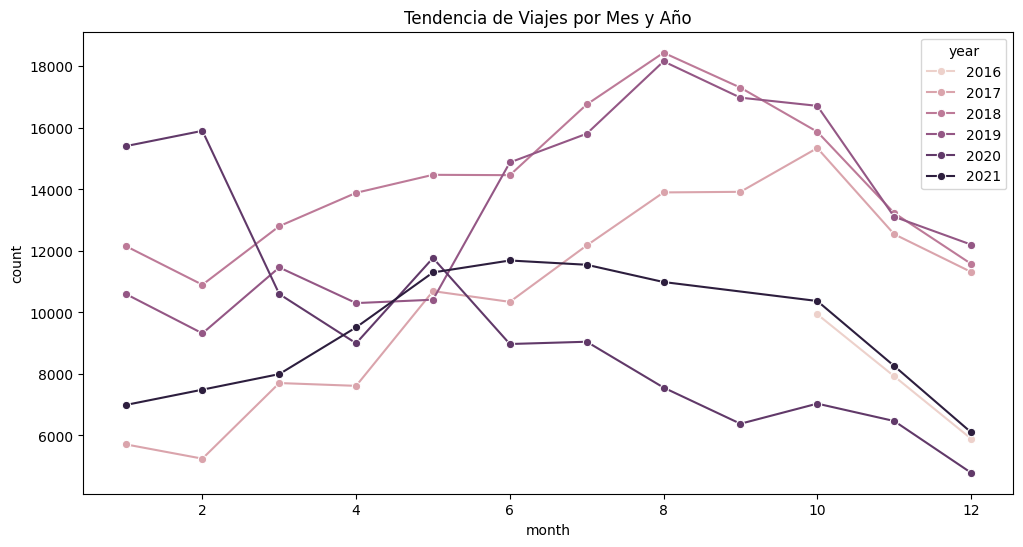

In [23]:
monthly_trends = df_.groupby(['year', 'month']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', hue='year', data=monthly_trends, marker='o')
plt.title('Tendencia de Viajes por Mes y Año')
plt.show()

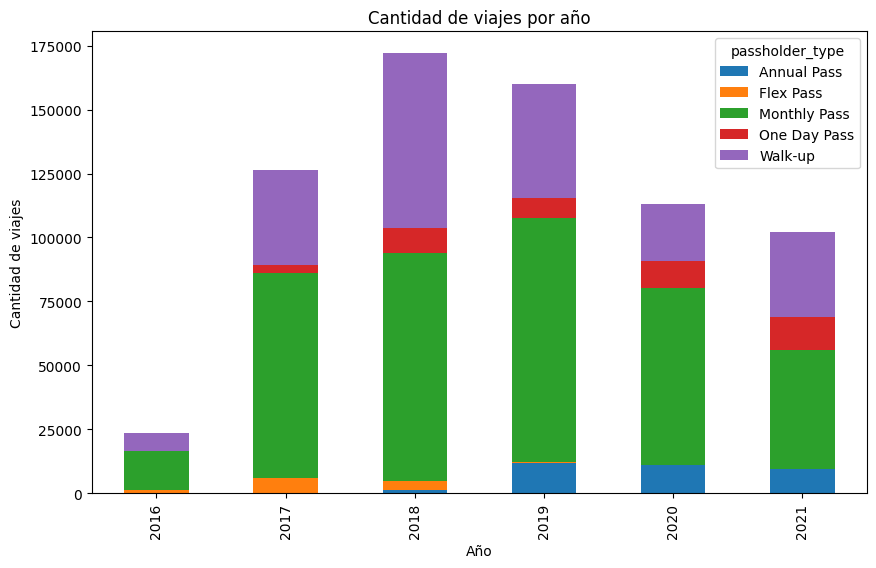

In [24]:
annual_growth = df_.groupby(['year', 'passholder_type']).size().unstack()
annual_growth.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cantidad de viajes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de viajes')    
plt.show()

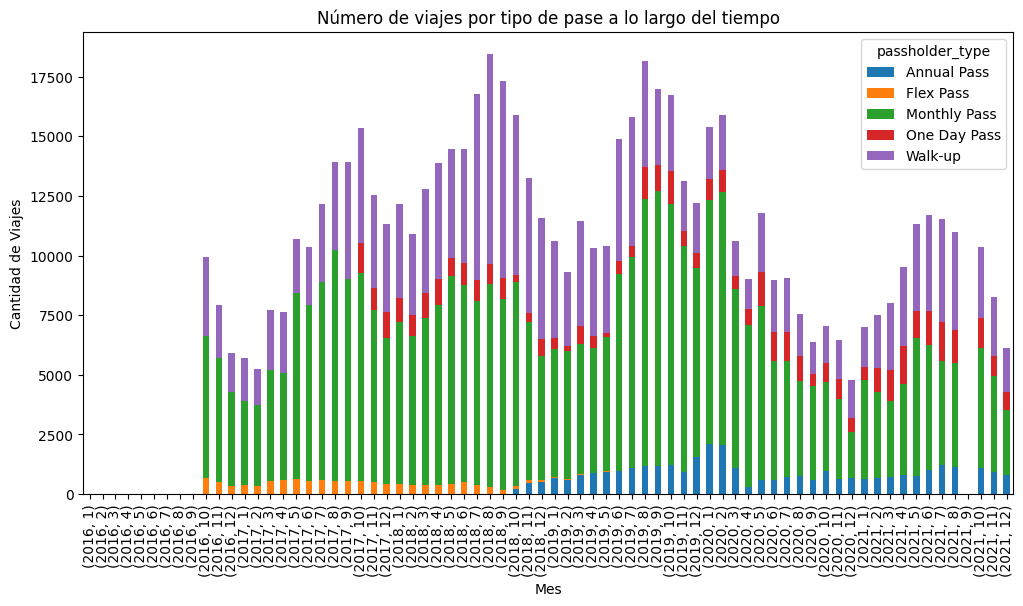

In [25]:
# Agrupar por año, mes y tipo de pasajero
monthly_growth = df_.groupby(['year', 'month', 'passholder_type']).size().unstack()

# Crear un índice completo de meses para el período deseado
start_year = monthly_growth.index.get_level_values('year').min()
end_year = monthly_growth.index.get_level_values('year').max()
full_index = pd.MultiIndex.from_product(
    [range(start_year, end_year + 1), range(1, 13)],  # Años y meses (1-12)
    names=['year', 'month']
)

# Reindexar el DataFrame para incluir todos los meses
monthly_growth = monthly_growth.reindex(full_index)

# Graficar
monthly_growth.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Número de viajes por tipo de pase a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Viajes')
plt.show()

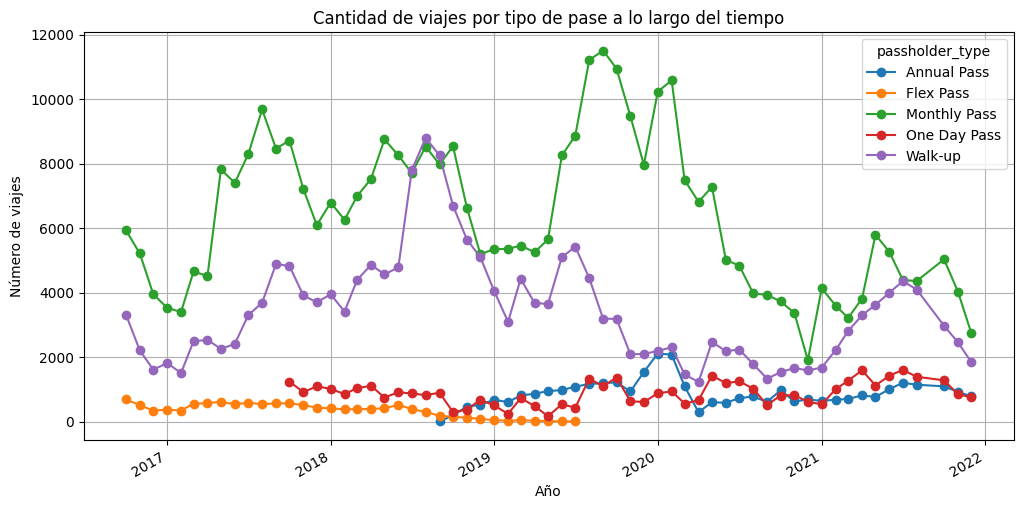

In [26]:
# Agrupar por año, mes y tipo de passholder
monthly_trips = df_.groupby(['year', 'month', 'passholder_type']).size().unstack()

# Crear un índice de tiempo (año-mes) para el eje x
monthly_trips.index = pd.to_datetime(monthly_trips.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Graficar
monthly_trips.plot(kind='line', figsize=(12, 6), marker = 'o')
plt.title('Cantidad de viajes por tipo de pase a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de viajes')
plt.grid(True) 
plt.show()

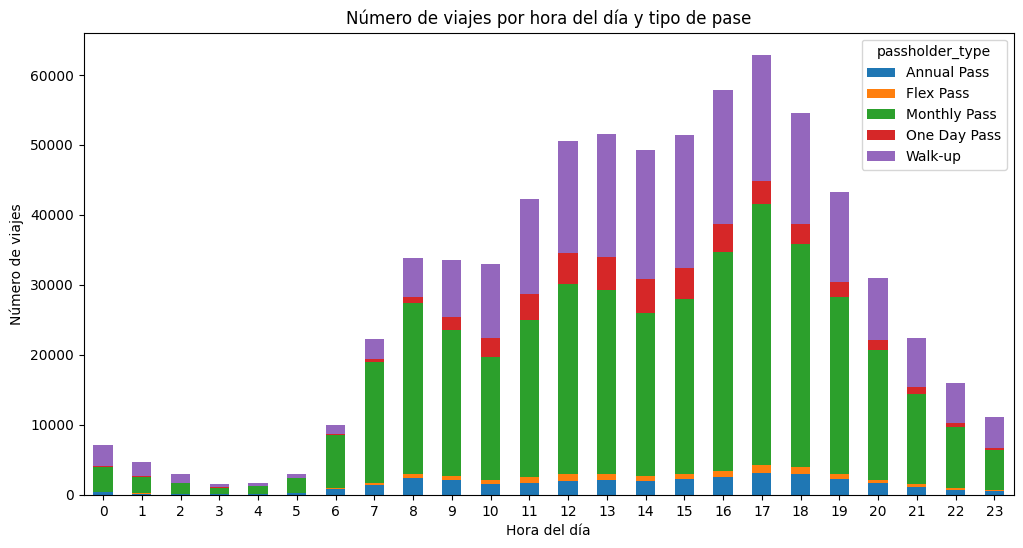

In [27]:
# Agrupar por hora y tipo de passholder
hourly_trips = df_.groupby(['hour', 'passholder_type']).size().unstack()

# Graficar
hourly_trips.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Número de viajes por hora del día y tipo de pase')
plt.xlabel('Hora del día')
plt.ylabel('Número de viajes')
plt.xticks(rotation=0) 
plt.show()

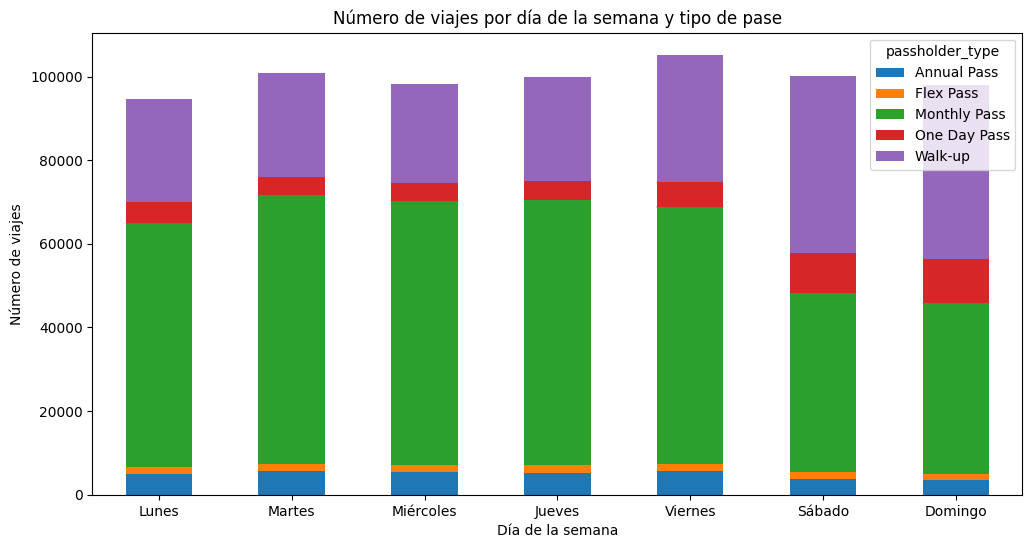

In [28]:
# Agrupar por día de la semana y tipo de passholder
daily_trips = df_.groupby(['day_of_week', 'passholder_type']).size().unstack()

# Ordenar los días de la semana en el orden correcto
daily_trips = daily_trips.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Graficar
daily_trips.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Número de viajes por día de la semana y tipo de pase')
plt.xlabel('Día de la semana')
plt.ylabel('Número de viajes')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

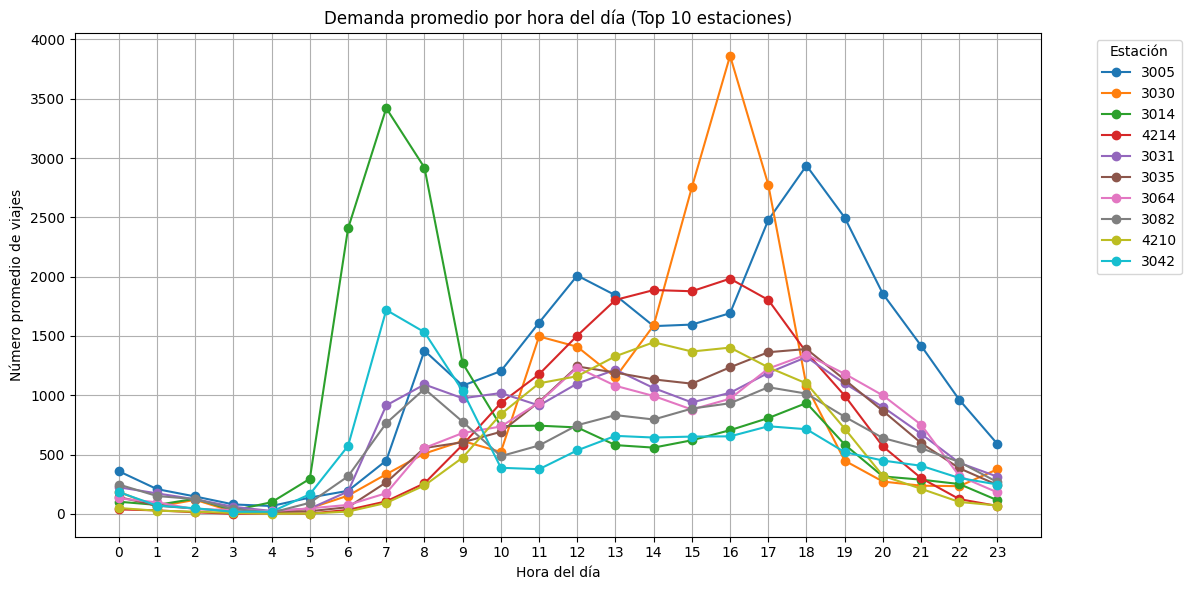

In [29]:
# Calcular la demanda promedio por estación y hora
demand_by_station_hour = df_.groupby(['start_station', 'hour']).size().unstack()

# Calcular el promedio de viajes por estación (promedio de todas las horas)
average_demand_by_station = demand_by_station_hour.mean(axis=1)

# Seleccionar las top 10 estaciones con mayor demanda promedio
top_10_stations = average_demand_by_station.nlargest(10).index

# Filtrar los datos para incluir solo las top 10 estaciones
top_10_demand = demand_by_station_hour.loc[top_10_stations]

# Graficar
plt.figure(figsize=(12, 6))
for station in top_10_demand.index:
    plt.plot(top_10_demand.columns, top_10_demand.loc[station], marker='o', label=station)

plt.title('Demanda promedio por hora del día (Top 10 estaciones)')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de viajes')
plt.xticks(range(24))  # Mostrar todas las horas del día
plt.grid(True)  # Agregar una cuadrícula para mejor legibilidad
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el layout para que no se corte la leyenda
plt.show()

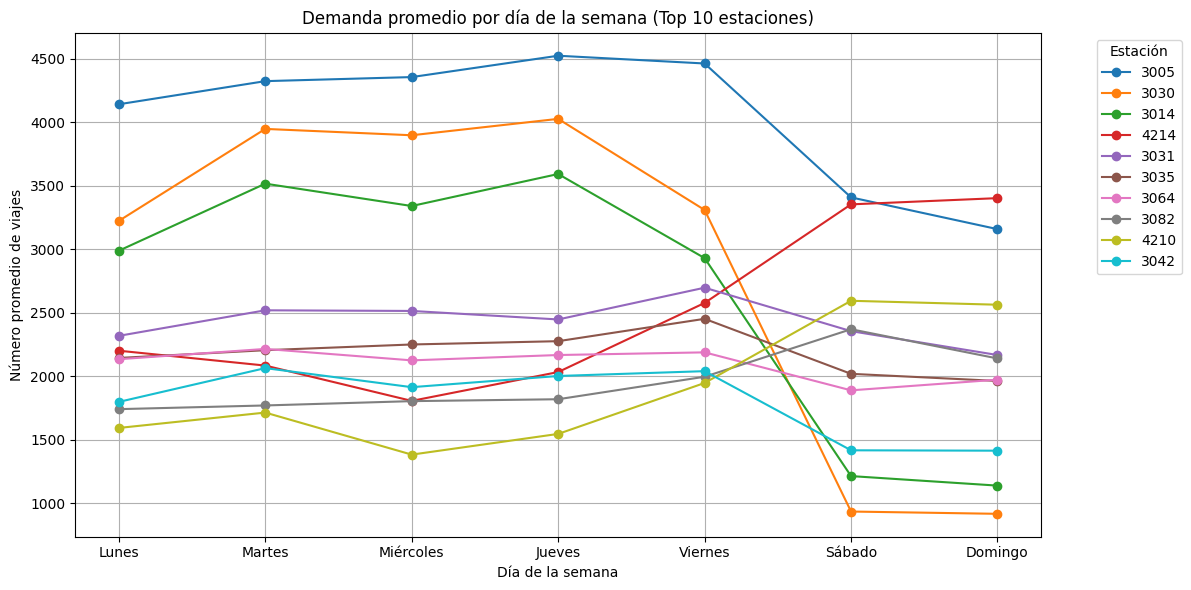

In [30]:
# Calcular la demanda promedio por estación y día de la semana
demand_by_station_day = df_.groupby(['start_station', 'day_of_week']).size().unstack()

# Calcular el promedio de viajes por estación (promedio de todos los días de la semana)
average_demand_by_station = demand_by_station_day.mean(axis=1)

# Seleccionar las top 10 estaciones con mayor demanda promedio
top_10_stations = average_demand_by_station.nlargest(10).index

# Filtrar los datos para incluir solo las top 10 estaciones
top_10_demand = demand_by_station_day.loc[top_10_stations]

# Ordenar los días de la semana en el orden correcto
top_10_demand = top_10_demand[['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']]

# Graficar
plt.figure(figsize=(12, 6))
for station in top_10_demand.index:
    plt.plot(top_10_demand.columns, top_10_demand.loc[station], marker='o', label=station)

plt.title('Demanda promedio por día de la semana (Top 10 estaciones)')
plt.xlabel('Día de la semana')
plt.ylabel('Número promedio de viajes')
plt.grid(True)  # Agregar una cuadrícula para mejor legibilidad
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el layout para que no se corte la leyenda
plt.show()

* Conclusiones análisis gráfico
- No se aprecia una tendencia a la alta en cuanto al uso de bicicletas
- Los planes de consumo anual tampoco presentan tendencia a la alta
- Los planes mensuales y diarios presentan picos de demanda a lo largo del año, valdría la pena incluir más variables relacionadas con la estacionalidad (como vacaciones, eventos, festivos) para complementar.
- Existen diferencias en la demanda de los distintos tipos de pase, entre fin de semana y dias entre semana. Los pases de mayor plazo (mensual hacia arriba) presentan mayor demanda durante la semana, en comparación con el fin de semana, posiblemente asociado a un mayor uso para transporte relacionado con actividades profesionales o trabajo. Por el contrario los one-day y walkup pass presentan un aumento en la demanda durante los fines de semana, pudiendo estar asociado con visitantes temporales, turismo, etc.


#### Exportamos data

In [31]:
df.to_csv('Data/train_set_eda.csv', index=False)